# ResNet

- **Training set**: LO_SARD102
- **Test/Validation set:** LO_SARD102
- **Features**: bert (64)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import applications
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import *
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import classification_report


X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

X_test = numpy.load('/mnt/md0/user/scheuererra68323/JTT_bert64_X.npy')
Y_test = pd.read_hdf('/mnt/md0/user/scheuererra68323/JTT_bert64_y.h5').is_vulnerable.values

print("class counts data set before undersampling:", Counter(Y_train))
# undersample class 0
X_train, Y_train = undersample( np.reshape(X_train, (-1, 64*768) ), Y_train)
X_train = np.reshape(X_train, (-1, 64, 768))

print("Y_train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nY_val:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\nY_test:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

class counts data set before undersampling: Counter({0: 15656, 1: 308})
Y_train:
Counter({0: 308, 1: 308})
(616, 64, 768)
(616,)

Y_val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

Y_test:
Counter({0: 5578, 1: 29})
(5607, 64, 768)
(5607,)


## Undersampling

In [2]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
20/20 [==============================] - 9s 427ms/step - loss: 1.6173 - accuracy: 0.7581 - val_loss: 0.7902 - val_accuracy: 0.0193
Epoch 2/8
20/20 [==============================] - 7s 347ms/step - loss: 0.0322 - accuracy: 0.9935 - val_loss: 0.8909 - val_accuracy: 0.0193
Epoch 3/8
20/20 [==============================] - 7s 349ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8494 - val_accuracy: 0.0193
Epoch 4/8
20/20 [==============================] - 7s 351ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.8211 - val_accuracy: 0.0193
Epoch 5/8
20/20 [==============================] - 7s 355ms/step - loss: 7.0063e-04 - accuracy: 1.0000 - val_loss: 0.7856 - val_accuracy: 0.0193
Epoch 6/8
20/20 [==============================] - 7s 358ms/step - loss: 7.1361e-04 - accuracy: 1.0000 - val_loss: 0.7323 - val_accuracy: 0.0193
Epoch 7/8
20/20 [==============================] - 7s 358ms/step - loss: 9.2158e-04 - accuracy: 1.0000 - val_loss: 0.6899 - val_accuracy: 0.5257
E

## Evaluation

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5578
           1       0.00      0.00      0.00        29

    accuracy                           0.99      5607
   macro avg       0.50      0.50      0.50      5607
weighted avg       0.99      0.99      0.99      5607

Confusion matrix:
[[5578    0]
 [  29    0]]

Confusion matrix (Percentages):
[[99.483  0.   ]
 [ 0.517  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



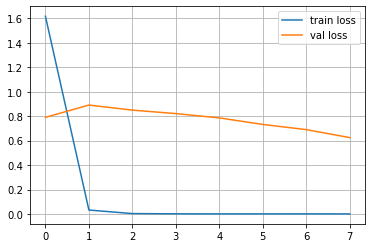

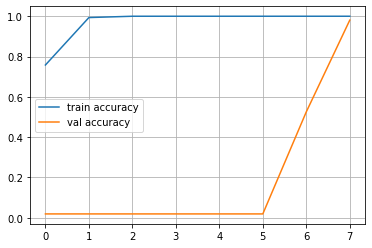

In [3]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [4]:
model.save('testJTT_ResNet_bert64_undersample.h5')

## weighted

In [5]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

classWeights = {
    0: ( 1 / Counter(Y_train)[0] ) * Y_train.shape[0] / 2.0 ,
    1: ( 1 / Counter(Y_train)[1] ) * Y_train.shape[0] / 2.0
}
print("weights:", classWeights)

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

weights: {0: 0.5098364844149208, 1: 25.915584415584416}
train:
Counter({0: 15656, 1: 308})
(15964, 64, 768)
(15964,)

val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

test:
Counter({0: 5578, 1: 29})
(5607, 64, 768)
(5607,)


In [6]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val),
                    class_weight=classWeights
                   )

Epoch 1/8
499/499 [==============================] - 69s 139ms/step - loss: 1.5404 - accuracy: 0.8763 - val_loss: 0.1175 - val_accuracy: 0.9797
Epoch 2/8
499/499 [==============================] - 68s 136ms/step - loss: 0.1992 - accuracy: 0.9767 - val_loss: 0.1279 - val_accuracy: 0.9807
Epoch 3/8
499/499 [==============================] - 67s 135ms/step - loss: 0.0336 - accuracy: 0.9919 - val_loss: 0.2942 - val_accuracy: 0.9724
Epoch 4/8
499/499 [==============================] - 67s 134ms/step - loss: 0.0068 - accuracy: 0.9975 - val_loss: 0.0153 - val_accuracy: 0.9987
Epoch 5/8
499/499 [==============================] - 67s 134ms/step - loss: 0.0102 - accuracy: 0.9967 - val_loss: 0.0153 - val_accuracy: 0.9987
Epoch 6/8
499/499 [==============================] - 67s 135ms/step - loss: 0.0339 - accuracy: 0.9962 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 7/8
499/499 [==============================] - 67s 135ms/step - loss: 0.0080 - accuracy: 0.9977 - val_loss: 0.0104 - val_accuracy:

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5578
           1       0.00      0.00      0.00        29

    accuracy                           0.99      5607
   macro avg       0.50      0.50      0.50      5607
weighted avg       0.99      0.99      0.99      5607

Confusion matrix:
[[5578    0]
 [  29    0]]

Confusion matrix (Percentages):
[[99.483  0.   ]
 [ 0.517  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



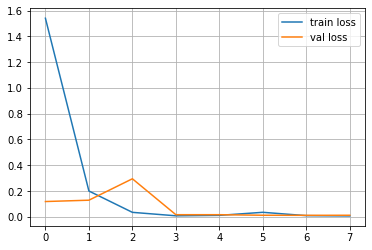

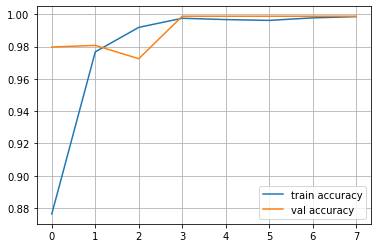

In [7]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [8]:
model.save('testJTT_ResNet_bert64_weighted.h5')

## No imbalance migation

In [9]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
499/499 [==============================] - 67s 135ms/step - loss: 0.1413 - accuracy: 0.9876 - val_loss: 22.0288 - val_accuracy: 0.9807
Epoch 2/8
499/499 [==============================] - 68s 136ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0224 - val_accuracy: 0.9922
Epoch 3/8
499/499 [==============================] - 67s 135ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0031 - val_accuracy: 0.9992
Epoch 4/8
499/499 [==============================] - 67s 135ms/step - loss: 0.0013 - accuracy: 0.9996 - val_loss: 0.0144 - val_accuracy: 0.9995
Epoch 5/8
499/499 [==============================] - 68s 136ms/step - loss: 9.5742e-04 - accuracy: 0.9996 - val_loss: 0.0055 - val_accuracy: 0.9995
Epoch 6/8
499/499 [==============================] - 67s 134ms/step - loss: 8.7760e-04 - accuracy: 0.9997 - val_loss: 0.0133 - val_accuracy: 0.9995
Epoch 7/8
499/499 [==============================] - 67s 134ms/step - loss: 5.7682e-04 - accuracy: 0.9997 - val_loss: 0.0091 - 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5578
           1       0.00      0.00      0.00        29

    accuracy                           0.99      5607
   macro avg       0.50      0.50      0.50      5607
weighted avg       0.99      0.99      0.99      5607

Confusion matrix:
[[5578    0]
 [  29    0]]

Confusion matrix (Percentages):
[[99.483  0.   ]
 [ 0.517  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



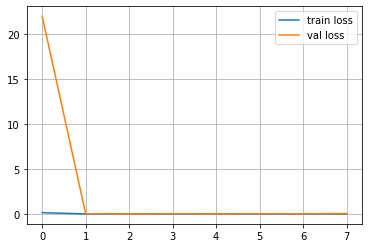

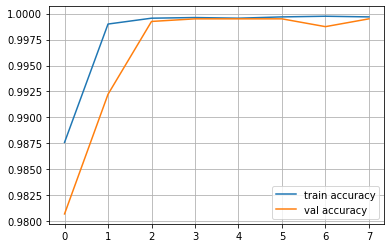

In [10]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [11]:
model.save('testJTT_ResNet_bert64.h5')

In [13]:
X_train = numpy.load('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_X.npy')
Y_train = pd.read_hdf('/mnt/md0/user/scheuererra68323/LOSARD102_bert64_y.h5').is_vulnerable.values

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, stratify=Y_train, test_size=0.2, random_state=10
)

# oversample class 1
X_train, Y_train = oversample_smote(np.reshape(X_train, (-1, 64*768)), Y_train )
X_train = np.reshape( X_train, (-1, 64, 768) )
print("class counts oversampled data set:", (X_train.shape[0], Y_train.shape[0]))

print("train:")
print(Counter(Y_train))
print(X_train.shape)
print(Y_train.shape)
print("\nval:")
print(Counter(Y_val))
print(X_val.shape)
print(Y_val.shape)
print("\ntest:")
print(Counter(Y_test))
print(X_test.shape)
print(Y_test.shape)

Y_train, Y_val = to_categorical(Y_train), to_categorical(Y_val)

imbalanced_learn version  0.7.0
Counter output before SMOTE: Counter({0: 15656, 1: 308})
Counter output after SMOTE: Counter({0: 15656, 1: 15656})
class counts oversampled data set: (31312, 31312)
train:
Counter({0: 15656, 1: 15656})
(31312, 64, 768)
(31312,)

val:
Counter({0: 3914, 1: 77})
(3991, 64, 768)
(3991,)

test:
Counter({0: 5578, 1: 29})
(5607, 64, 768)
(5607,)


In [14]:
# https://keras.io/api/applications/resnet/#resnet50-function
model = applications.ResNet50(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=(64, 768, 1),
    pooling=None,
    classes=2
)

sgd = tf.keras.optimizers.SGD(learning_rate=0.1)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    epochs=8,
                    verbose=True,
                    validation_data=(X_val, Y_val)
                   )

Epoch 1/8
979/979 [==============================] - 129s 131ms/step - loss: 0.2979 - accuracy: 0.9807 - val_loss: 0.0083 - val_accuracy: 0.9995
Epoch 2/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0134 - val_accuracy: 0.9970
Epoch 3/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.0070 - val_accuracy: 0.9987
Epoch 4/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.0106 - val_accuracy: 0.9982
Epoch 5/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 0.0099 - val_accuracy: 0.9982
Epoch 6/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0023 - accuracy: 0.9993 - val_loss: 0.0065 - val_accuracy: 0.9987
Epoch 7/8
979/979 [==============================] - 127s 130ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.0062 - val_ac

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      1.00      5578
           1       0.00      0.00      0.00        29

    accuracy                           0.99      5607
   macro avg       0.50      0.50      0.50      5607
weighted avg       0.99      0.99      0.99      5607

Confusion matrix:
[[5578    0]
 [  29    0]]

Confusion matrix (Percentages):
[[99.483  0.   ]
 [ 0.517  0.   ]]

Metrics:
Sensitivity (TPR): 0.000000
Specifity (TNR):   1.000000

FPR: 0.000000
FNR: 1.000000

Balanced accuracy: 0.500000



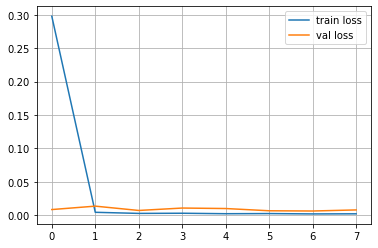

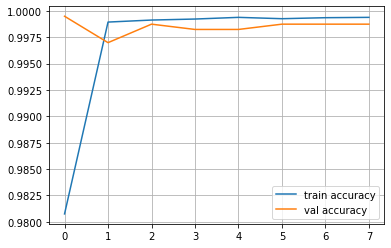

In [15]:
Y_pred = numpy.argmax(model.predict(X_test) , axis=1 )

print(classification_report(Y_test, Y_pred))
print_metrics(confusion_matrix(Y_test, Y_pred), Y_test)
print()

plot_loss(history)
plot_accuracy(history)

In [16]:
model.save('testJTT_ResNet_bert64_SMOTE.h5')